In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, neighbors 
import sklearn.model_selection as ms

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Создание датасета

In [4]:
classification_problem = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, 
                                                      n_classes=3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [5]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

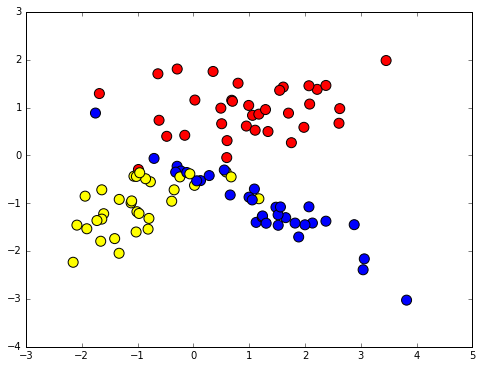

In [10]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

Визуализация разделяющей плоскости (взято из классной работы)

In [11]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [12]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [14]:
train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

Нарисуем графики для различного количества ближайших соседей $k$

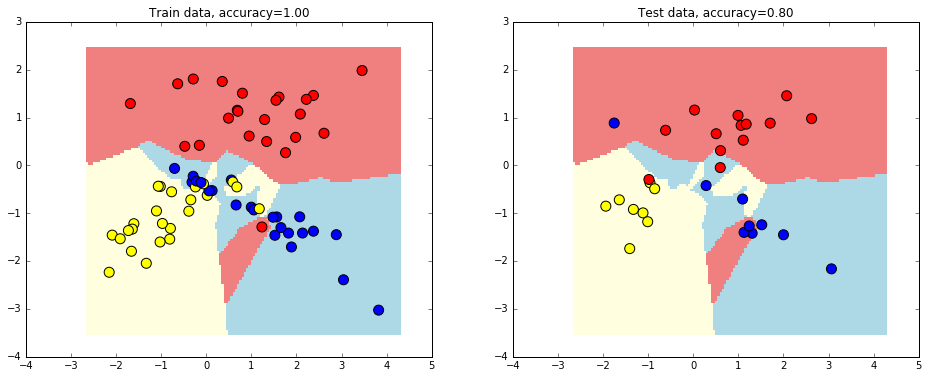

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

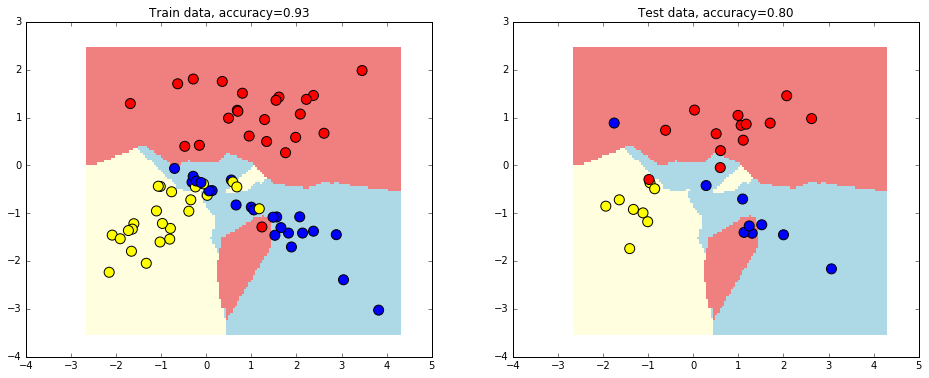

In [17]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

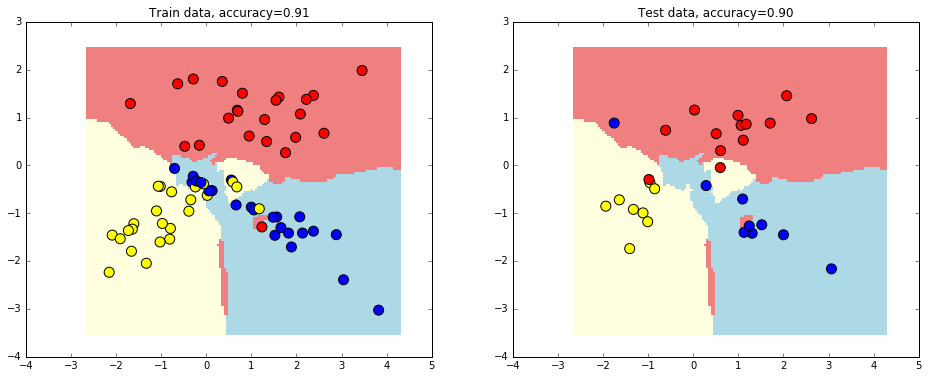

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

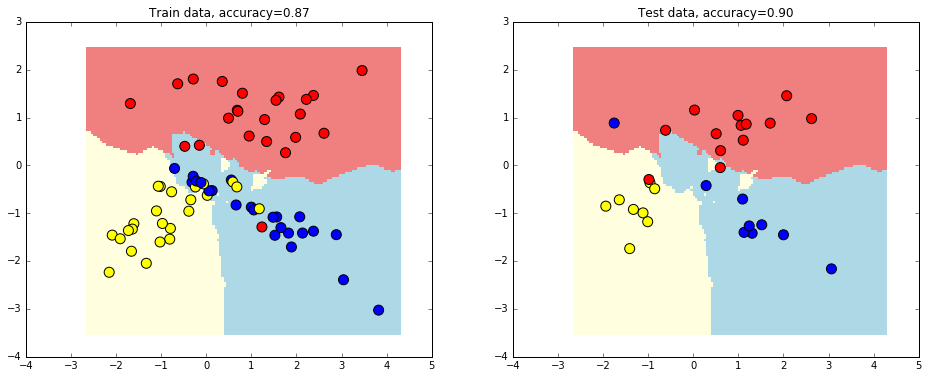

In [19]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

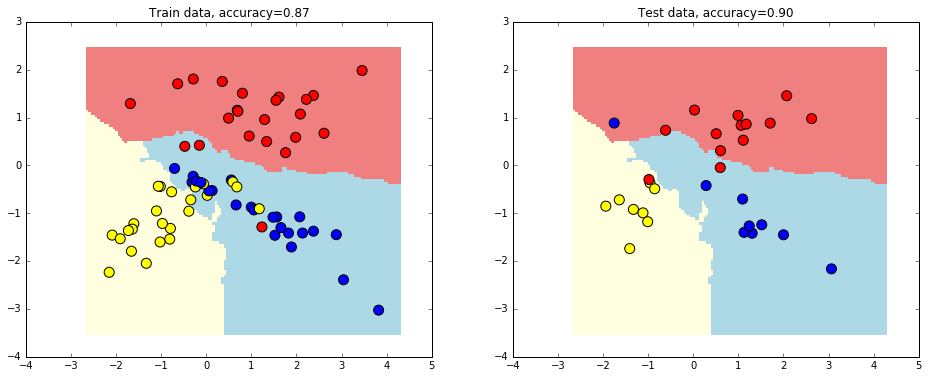

In [20]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

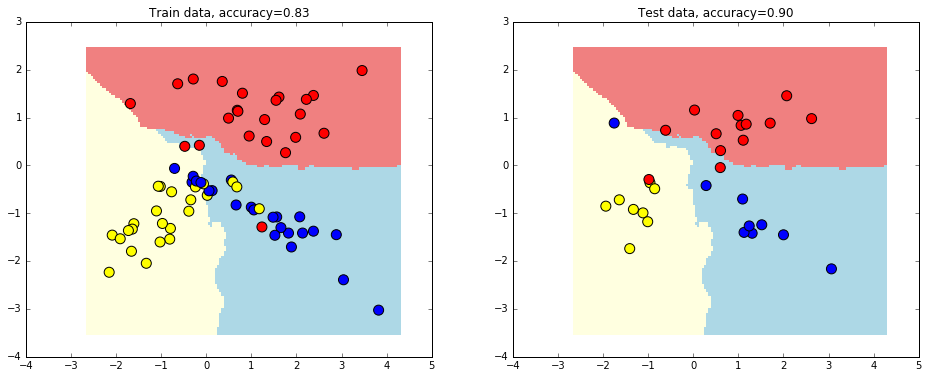

In [21]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

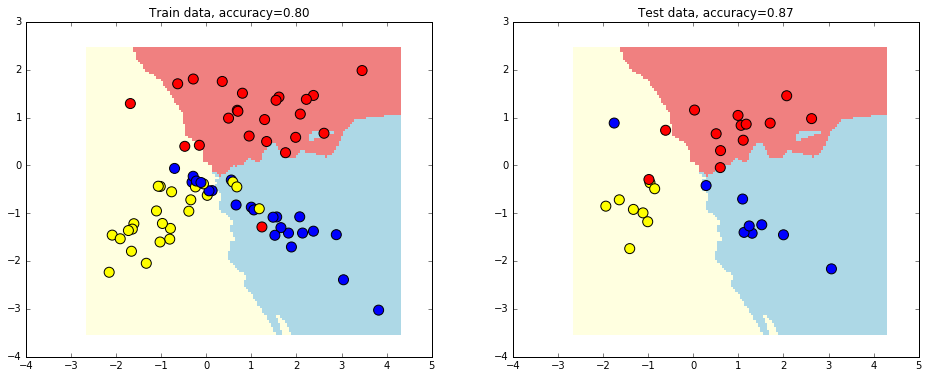

In [22]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=50)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

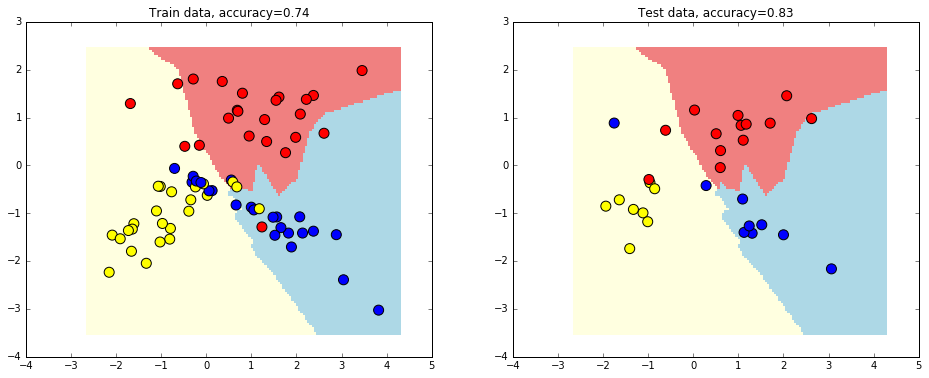

In [25]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=60)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Функция cross_val_score запускает KFold CV, где параметр $k$ передается как cv (здесь cv=5)

In [56]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)
ms.cross_val_score(estimator, classification_problem[0], classification_problem[1], cv=5)

array([ 0.86363636,  0.9047619 ,  0.84210526,  0.94736842,  0.78947368])

Посчитаем cross_val_score и выберим оптимальное количество соседей. Выбирать будем средний результат в серии

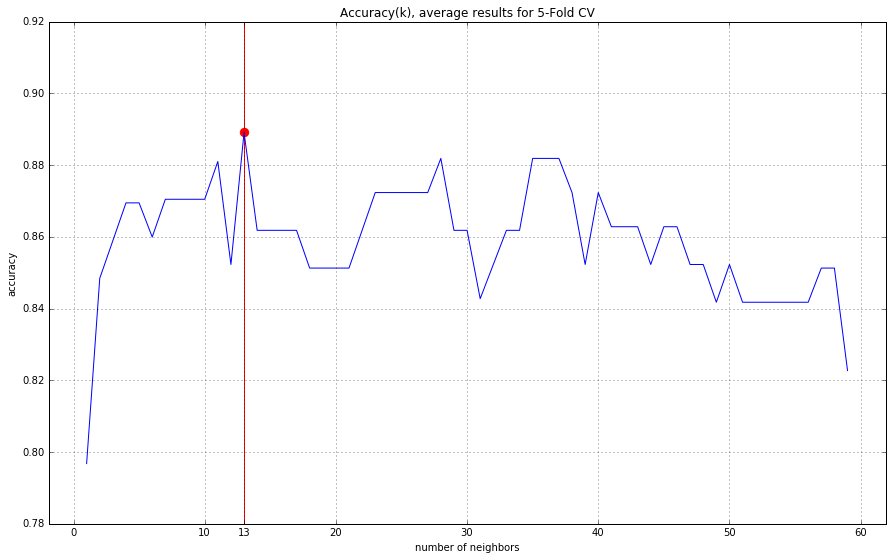

In [57]:
ks = np.arange(1, 60)
plt.figure(figsize=(15,9))
plt.title('Accuracy(k), average results for 5-Fold CV')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
dat = [np.average(ms.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k), classification_problem[0], classification_problem[1], cv=5)) for k in ks]
plt.grid()
plt.xticks(range(0, 61, 10) + [np.argmax(dat) + 1])
plt.axvline(np.argmax(dat) + 1, color='red', label='max accuracy')
plt.scatter(np.argmax(dat) + 1, np.max(dat), color='red', s=70)
plt.plot(ks, dat)

best_k_avg = np.argmax(dat) + 1

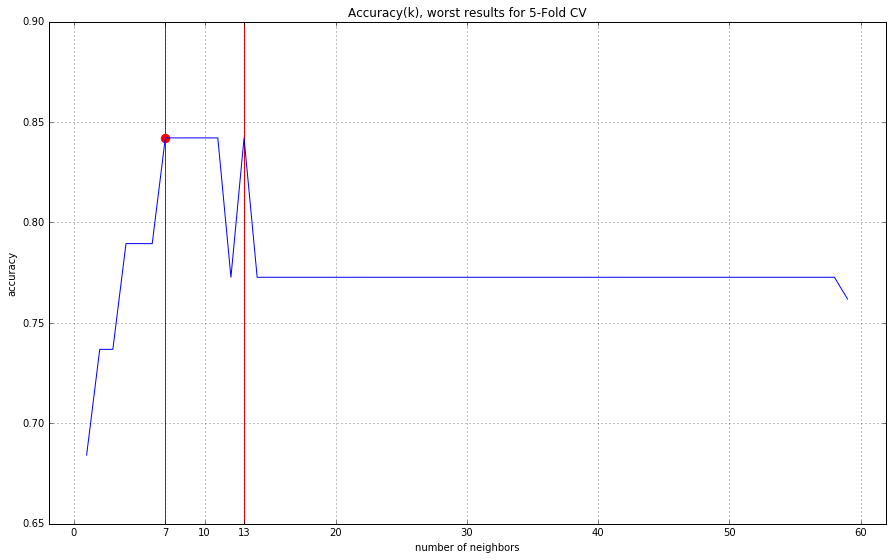

In [89]:
ks = np.arange(1, 60)
plt.figure(figsize=(15,9))
plt.title('Accuracy(k), worst results for 5-Fold CV')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
dat = [np.min(ms.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k), classification_problem[0], classification_problem[1], cv=5)) for k in ks]
plt.grid()
plt.xticks(range(0, 61, 10) + [np.argmax(dat) + 1] + [13])
plt.axvline(np.argmax(dat) + 1, color='red', label='max accuracy')
plt.axvline(13, color='red', label='max accuracy')
plt.scatter(np.argmax(dat) + 1, np.max(dat), color='red', s=70)
plt.plot(ks, dat)

best_k_min = np.argmax(dat) + 1

Как мы видим, $k=13$ является (на текущих сгенерированных случайных данных) оптимальным количеством соседей